<a href="https://colab.research.google.com/github/asalesg/python2/blob/main/pandasIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# criando os nomes



In [1]:
import pandas as pd

In [2]:
nomes_f = pd.read_json('https://guilhermeonrails.github.io/nomes_ibge/nomes-f.json')
nomes_m = pd.read_json('https://guilhermeonrails.github.io/nomes_ibge/nomes-m.json')

In [3]:
nomes_m.sample(5) #vem nomes aleaorios

,nome,regiao,freq,rank,sexo
53,RONALDO,0,269489,54,M
124,CESAR,0,118354,125,M
164,JAIRO,0,78445,165,M
126,MURILO,0,115067,127,M
146,WILIAN,0,95105,147,M


In [4]:
print('Quantidade de nomes:' + str(len(nomes_f) + len(nomes_m)))

Quantidade de nomes:400


In [5]:
frames = [nomes_f, nomes_m]

In [6]:
nomes = pd.concat(frames)['nome'].to_frame()
nomes.sample(5)

,nome
56,SUELI
117,WAGNER
112,VANDERLEI
192,AGNALDO
8,LUIZ


# incluindoo id dos alunos

In [7]:
import numpy as np

In [8]:
np.random.seed(123)

In [9]:
total_alunos = len(nomes)

In [10]:
total_alunos

400

In [11]:
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1

In [12]:
nomes.sample(5)

,nome,id_aluno
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382
182,CHARLES,33
30,ANDERSON,111


In [13]:
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [14]:
nomes

,nome,id_aluno,dominio
0,MARIA,235,@dominiodoemail.com.br
1,ANA,43,@servicodoemail.com
2,FRANCISCA,304,@servicodoemail.com
3,ANTONIA,156,@dominiodoemail.com.br
4,ADRIANA,343,@servicodoemail.com
...,...,...,...
195,WALTER,231,@dominiodoemail.com.br
196,ARLINDO,99,@servicodoemail.com
197,MICHAEL,323,@dominiodoemail.com.br
198,ALVARO,383,@dominiodoemail.com.br


In [15]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [16]:
nomes.sample(5)

,nome,id_aluno,dominio,email
84,SEVERINO,78,@dominiodoemail.com.br,severino@dominiodoemail.com.br
0,JOSE,331,@servicodoemail.com,jose@servicodoemail.com
179,IAGO,340,@dominiodoemail.com.br,iago@dominiodoemail.com.br
10,SANDRA,174,@dominiodoemail.com.br,sandra@dominiodoemail.com.br
171,TERESINHA,45,@dominiodoemail.com.br,teresinha@dominiodoemail.com.br


# criando a tabela cursos

In [17]:
!pip3 install html5lib
!pip3 install lxml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
import html5lib

In [19]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)

In [20]:
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [21]:
type(cursos)

list

In [22]:
cursos = cursos[0]

In [23]:
type(cursos)

pandas.core.frame.DataFrame

In [24]:
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


# alterando index de cursos

In [25]:
cursos = cursos.rename(columns={'Nome do curso':'nome_do_curso'})

In [26]:
cursos.head()

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [27]:
cursos['id'] = cursos.index + 1

In [28]:
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [29]:
cursos.set_index('id')

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,.NET para web
8,Novas integrações com Java
9,TDD com Java


In [30]:
nomes.sample(5)

,nome,id_aluno,dominio,email
114,ARTHUR,320,@dominiodoemail.com.br,arthur@dominiodoemail.com.br
57,DAIANE,303,@servicodoemail.com,daiane@servicodoemail.com
85,HELENA,221,@dominiodoemail.com.br,helena@dominiodoemail.com.br
183,IRACI,8,@dominiodoemail.com.br,iraci@dominiodoemail.com.br
189,DALVA,137,@dominiodoemail.com.br,dalva@dominiodoemail.com.br


# matriculando os alunos nos cursos

In [31]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)

In [32]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
105,MILENA,371,@dominiodoemail.com.br,milena@dominiodoemail.com.br,2
183,IRACI,8,@dominiodoemail.com.br,iraci@dominiodoemail.com.br,1
10,LUIS,125,@dominiodoemail.com.br,luis@dominiodoemail.com.br,2
139,OSMAR,71,@dominiodoemail.com.br,osmar@dominiodoemail.com.br,2
40,SERGIO,139,@servicodoemail.com,sergio@servicodoemail.com,2


In [33]:
nomes.matriculas.describe()

count    400.000000
mean       2.135000
std        1.515757
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       12.000000
Name: matriculas, dtype: float64

In [34]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


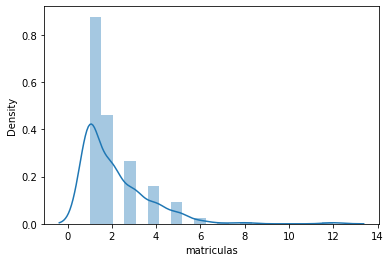

In [35]:
sns.distplot(nomes.matriculas)

In [36]:
nomes.matriculas.value_counts()

1     184
2      97
3      56
4      34
5      19
6       5
12      2
8       2
7       1
Name: matriculas, dtype: int64

In [37]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
103,MAICON,295,@servicodoemail.com,maicon@servicodoemail.com,4
44,RAIMUNDA,259,@servicodoemail.com,raimunda@servicodoemail.com,5
50,RAFAELA,27,@dominiodoemail.com.br,rafaela@dominiodoemail.com.br,3
171,TERESINHA,45,@dominiodoemail.com.br,teresinha@dominiodoemail.com.br,1
41,CLAUDIO,204,@servicodoemail.com,claudio@servicodoemail.com,1


# selecionando cursos

In [38]:
todas_mtriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [39]:
for index, row in nomes.iterrows():
  id = row.id_aluno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_mtriculas.append(mat)

matriculas = pd.DataFrame(todas_mtriculas, columns = ['id_aluno', 'id_curso'])

In [40]:
matriculas.head()

,id_aluno,id_curso
0,235,18
1,43,5
2,304,15
3,304,17
4,304,10


In [41]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
0,77,Lógica de programação
1,4,Java para Web
2,32,C# para Web
3,68,Ruby on Rails
4,17,Cursos de Python
5,36,PHP com MySql
6,38,.NET para web
7,16,Novas integrações com Java
8,41,TDD com Java


In [42]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
9,ALINE,92,@dominiodoemail.com.br,aline@dominiodoemail.com.br,1
14,MARCELO,138,@dominiodoemail.com.br,marcelo@dominiodoemail.com.br,4
141,ORLANDO,159,@servicodoemail.com,orlando@servicodoemail.com,8


In [43]:
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [44]:
matriculas.head()

,id_aluno,id_curso
0,235,18
1,43,5
2,304,15
3,304,17
4,304,10


In [45]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

In [46]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
0,77,Lógica de programação
1,4,Java para Web
2,32,C# para Web
3,68,Ruby on Rails
4,17,Cursos de Python


# saida em diferentes formatos

In [47]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index=False)

In [48]:
pd.read_csv('matriculas_por_curso.csv')

,quantidade_de_alunos,nome_do_curso
0,77,Lógica de programação
1,4,Java para Web
2,32,C# para Web
3,68,Ruby on Rails
4,17,Cursos de Python
5,36,PHP com MySql
6,38,.NET para web
7,16,Novas integrações com Java
8,41,TDD com Java
9,67,Código limpo com C#


In [49]:
matriculas_json = matriculas_por_curso.to_json()

In [50]:
matriculas_json

'{"quantidade_de_alunos":{"0":77,"1":4,"2":32,"3":68,"4":17,"5":36,"6":38,"7":16,"8":41,"9":67,"10":56,"11":87,"12":17,"14":23,"15":74,"16":13,"17":65,"18":81,"19":42},"nome_do_curso":{"0":"L\\u00f3gica de programa\\u00e7\\u00e3o","1":"Java para Web","2":"C# para Web","3":"Ruby on Rails","4":"Cursos de Python","5":"PHP com MySql","6":".NET para web","7":"Novas integra\\u00e7\\u00f5es com Java","8":"TDD com Java","9":"C\\u00f3digo limpo com C#","10":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","11":"Hardware b\\u00e1sico","12":"Persist\\u00eancia com .NET","14":"An\\u00e1lise de dados","15":"Estat\\u00edstica b\\u00e1sica","16":"Internet das coisas","17":"Programa\\u00e7\\u00e3o funcional","18":"Boas pr\\u00e1ticas em Java","19":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [51]:
matriculas_html = matriculas_por_curso.to_html()

In [52]:
matriculas_html

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>quantidade_de_alunos</th>\n      <th>nome_do_curso</th>\n    </tr>\n    <tr>\n      <th>id_curso</th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>77</td>\n      <td>Lógica de programação</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>4</td>\n      <td>Java para Web</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>32</td>\n      <td>C# para Web</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>68</td>\n      <td>Ruby on Rails</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>17</td>\n      <td>Cursos de Python</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>36</td>\n      <td>PHP com MySql</td>\n    </tr>\n    <tr>\n      <th>6</th>\n      <td>38</td>\n      <td>.NET para web</td>\n    </tr>\n    <tr>\n      <th>7</th>\n      <td>16</td>\n      <td>Novas integrações com Java</td>\n 

In [53]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>77</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>1</th>
      <td>4</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>2</th>
      <td>32</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>68</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>4</th>
      <td>17</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>5</th>
      <td>36</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>6</th>
      <td>38</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>7</th>
      <td>16</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>8</th>
      <td>41</td>
 

# criando o banco SQL

In [55]:
from sqlalchemy import create_engine, MetaData, Table, inspect # adicionando o método inspect

engine = create_engine('sqlite:///:memory:')
engine
type(engine)

sqlalchemy.engine.base.Engine

In [56]:
matriculas_por_curso.to_sql('matriculas', engine)

In [57]:
inspector = inspect(engine) # criando um Inspector object
print(inspector.get_table_names()) # Exibindo as tabelas com o inspecto

['matriculas']


# buscando do banco SQL

In [58]:
query = 'select * from matriculas where quantidade_de_alunos <20'

In [59]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,1,4,Java para Web
1,4,17,Cursos de Python
2,7,16,Novas integrações com Java
3,12,17,Persistência com .NET
4,16,13,Internet das coisas


In [60]:
pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,77
1,Java para Web,4
2,C# para Web,32
3,Ruby on Rails,68
4,Cursos de Python,17
5,PHP com MySql,36
6,.NET para web,38
7,Novas integrações com Java,16
8,TDD com Java,41
9,Código limpo com C#,67


In [61]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

In [62]:
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,77
1,Java para Web,4
2,C# para Web,32
3,Ruby on Rails,68
4,Cursos de Python,17
5,PHP com MySql,36
6,.NET para web,38
7,Novas integrações com Java,16
8,TDD com Java,41
9,Código limpo com C#,67


In [63]:
muitas_matriculas.query('quantidade_de_alunos > 60')

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,77
3,Ruby on Rails,68
9,Código limpo com C#,67
11,Hardware básico,87
14,Estatística básica,74
16,Programação funcional,65
17,Boas práticas em Java,81


In [64]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 60')

# escrevendo no banco

In [65]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

In [66]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


# nomes dos alunos da proxima turma

In [67]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
0,77,Lógica de programação
1,4,Java para Web
2,32,C# para Web
3,68,Ruby on Rails
4,17,Cursos de Python


In [68]:
matriculas

,id_aluno,id_curso
0,235,18
1,43,5
2,304,15
3,304,17
4,304,10
...,...,...
849,323,6
850,323,10
851,383,10
852,366,0


In [70]:
id_curso = 4
proxima_turma = matriculas.query("id_curso == {}".format(id_curso))

In [71]:
proxima_turma

,id_aluno,id_curso
129,233,4
184,329,4
194,126,4
223,148,4
232,149,4
268,285,4
349,247,4
367,82,4
409,229,4
425,38,4


In [72]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
98,GILSON,134,@dominiodoemail.com.br,gilson@dominiodoemail.com.br,2
93,ADILSON,257,@dominiodoemail.com.br,adilson@dominiodoemail.com.br,3
42,MARLENE,268,@servicodoemail.com,marlene@servicodoemail.com,4


In [74]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
233,4,ELAINE,@servicodoemail.com,elaine@servicodoemail.com,4
329,4,MONICA,@dominiodoemail.com.br,monica@dominiodoemail.com.br,1
126,4,FATIMA,@servicodoemail.com,fatima@servicodoemail.com,2
148,4,THAIS,@servicodoemail.com,thais@servicodoemail.com,5
149,4,MARILENE,@dominiodoemail.com.br,marilene@dominiodoemail.com.br,1
285,4,VANIA,@dominiodoemail.com.br,vania@dominiodoemail.com.br,12
247,4,RAIANE,@servicodoemail.com,raiane@servicodoemail.com,1
82,4,IARA,@servicodoemail.com,iara@servicodoemail.com,6
229,4,NAIARA,@dominiodoemail.com.br,naiara@dominiodoemail.com.br,3


In [75]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
233       ELAINE
329       MONICA
126       FATIMA
148        THAIS
149     MARILENE
285        VANIA
247       RAIANE
82          IARA
229       NAIARA
38       ISADORA
70      RAIMUNDO
152    SEBASTIAO
131         DAVI
141        PABLO
263         IVAN
312    WANDERSON
74        MARLON
Name: nome, dtype: object

In [76]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
233,ELAINE
329,MONICA
126,FATIMA
148,THAIS
149,MARILENE
285,VANIA
247,RAIANE
82,IARA
229,NAIARA


In [77]:
nome_curso = cursos.loc[id_curso]

In [78]:
nome_curso

nome_do_curso    Cursos de Python
id                              5
Name: 4, dtype: object

In [79]:
nome_curso = nome_curso.nome_do_curso

In [80]:
nome_curso

'Cursos de Python'

In [81]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [82]:
proxima_turma

,nome
id_aluno,
233,ELAINE
329,MONICA
126,FATIMA
148,THAIS
149,MARILENE
285,VANIA
247,RAIANE
82,IARA
229,NAIARA


In [83]:
proxima_turma.rename(columns = {'nome': 'Alunos do curso de {}'.format(nome_curso)})

,Alunos do curso de Cursos de Python
id_aluno,
233,ELAINE
329,MONICA
126,FATIMA
148,THAIS
149,MARILENE
285,VANIA
247,RAIANE
82,IARA
229,NAIARA


In [84]:
proxima_turma = proxima_turma.rename(columns = {'nome': 'Alunos do curso de {}'.format(nome_curso)})

In [85]:
proxima_turma.sample(5)

,Alunos do curso de Cursos de Python
id_aluno,
148,THAIS
82,IARA
233,ELAINE
149,MARILENE
329,MONICA


# excel

In [86]:
proxima_turma.to_excel('proxima_turma.xlsx', index=False)

In [87]:
pd.read_excel('proxima_turma.xlsx')

,Alunos do curso de Cursos de Python
0,ELAINE
1,MONICA
2,FATIMA
3,THAIS
4,MARILENE
5,VANIA
6,RAIANE
7,IARA
8,NAIARA
9,ISADORA
